<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
sns.set_style("whitegrid")


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

load sat_scores data and print dataset

In [50]:
sat_scores =pd.read_csv('sat_scores.csv')
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [51]:
df_read = pd.DataFrame.from_csv('sat_scores.csv')
df_read.head()

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516


### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [52]:
df_read.head(10)

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


This is a SAT score datset where column 'State' represents the various states in U.S and columns 'Verbal'and 'Math' represent the SAT score obtained in the corrsponding states. The column 'Rate' is the participation rate i.e % of high school students who took the SAT test in that state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [53]:

data_dictionary = { 'Rate':   "Students taking the SAT test, inter",
                    'Verbal': "Students scored in Verbal, inter",
                    'Math':   "Students scored in Maths, inter",
                    'State':  "Abbreviated name of US states",
                    'Shape_of_dataset':  "Data shows all 51 US states, for 3 columns 'Rate','Verbal' and 'Math' score.(51x3)"
                  }
data_dictionary

{'Math': 'Students scored in Maths, inter',
 'Rate': 'Students taking the SAT test, inter',
 'Shape_of_dataset': "Data shows all 51 US states, for 3 columns 'Rate','Verbal' and 'Math' score.(51x3)",
 'State': 'Abbreviated name of US states',
 'Verbal': 'Students scored in Verbal, inter'}

In [54]:
sat_scores.shape

(52, 4)

In [55]:
df_read.shape


(52, 3)

In [56]:
sat_scores.info

<bound method DataFrame.info of    State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM   

In [57]:
sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [58]:
sat_scores.Rate

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

 Using seaborn's distplot, plot the distributions for Rate

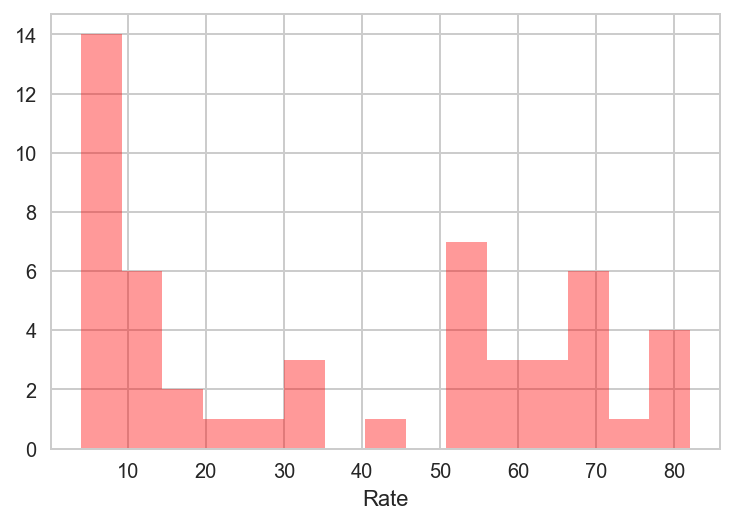

In [59]:
sns.distplot(df_read['Rate'],kde=False, bins=15, color ='r')

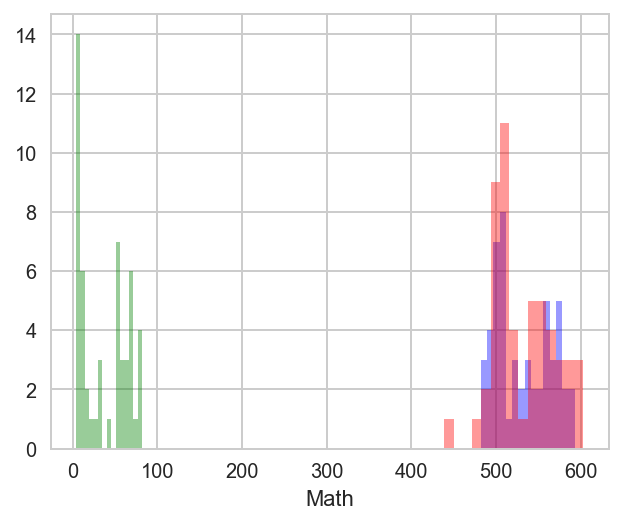

In [60]:
(fig,ax) = plt.subplots(figsize = (5,4))
sns.distplot(df_read.Rate,kde=False,ax=ax,label='Rate',bins=15, color ='green')
sns.distplot(df_read.Verbal,kde=False,ax=ax,label='Verbal',bins=15, color='blue')
sns.distplot(df_read.Math,kde=False,ax=ax,label='Math',bins=15, color ='r')

Using seaborn's distplot, plot the distributions for Math

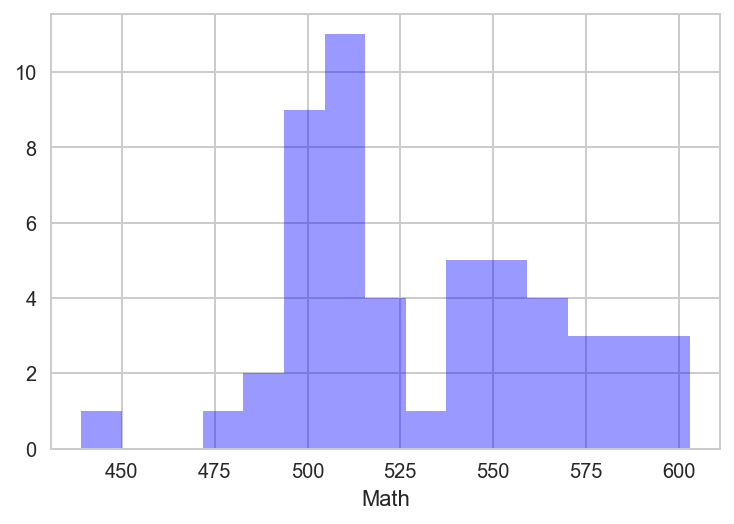

In [61]:
sns.distplot(df_read['Math'],kde=False, bins=15, color = 'blue')

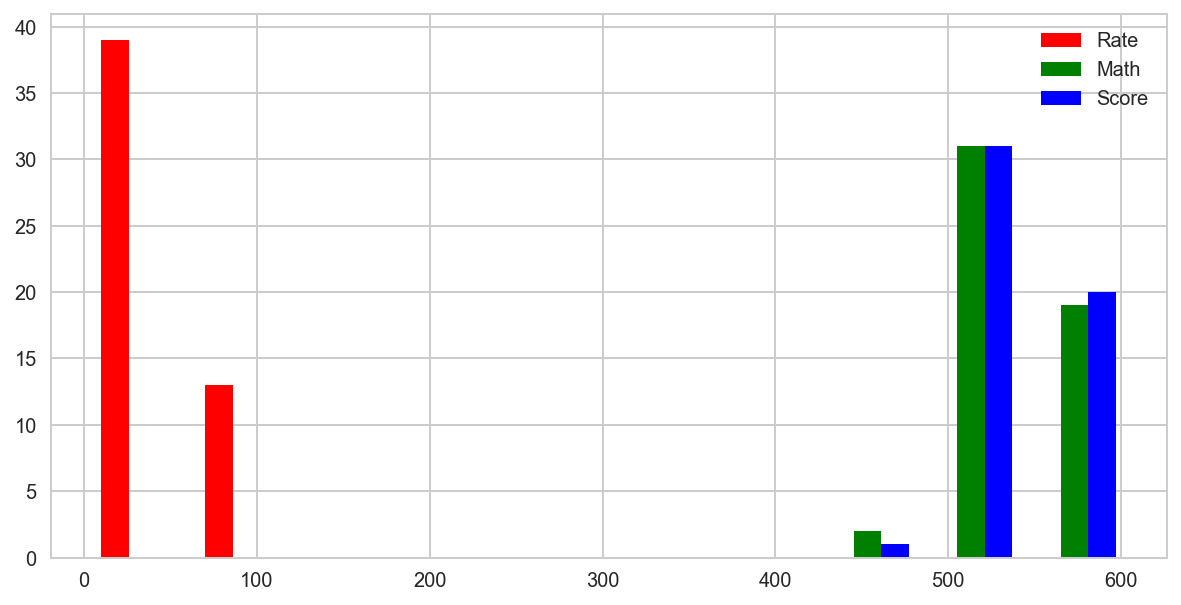

In [68]:
plt.figure(figsize=(10,5))
plt.hist([df_read.Rate,df_read.Math,df_read.Verbal],color=['r','g','b'],bins=10,label=['Rate','Math','Score'])
plt.legend(loc='best')
None

Using seaborn's distplot, plot the distributions for Verbal

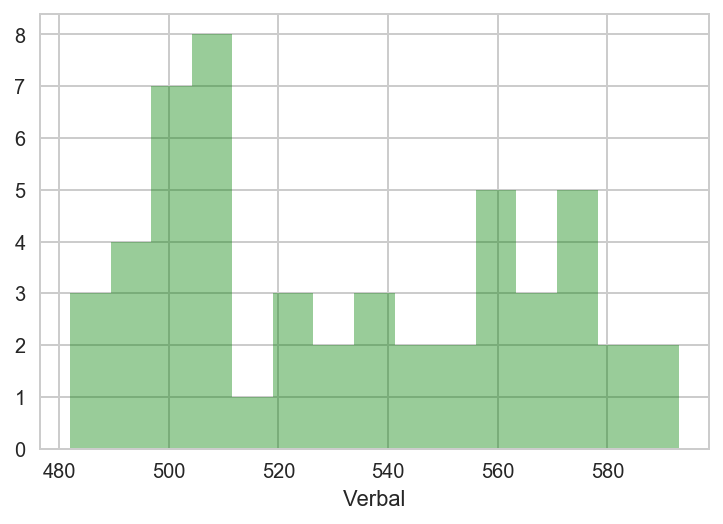

In [69]:
sns.distplot(df_read['Verbal'],kde=False, bins = 15, color = 'green')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Using seaborn's pairplot, show the joint distributions for Rate

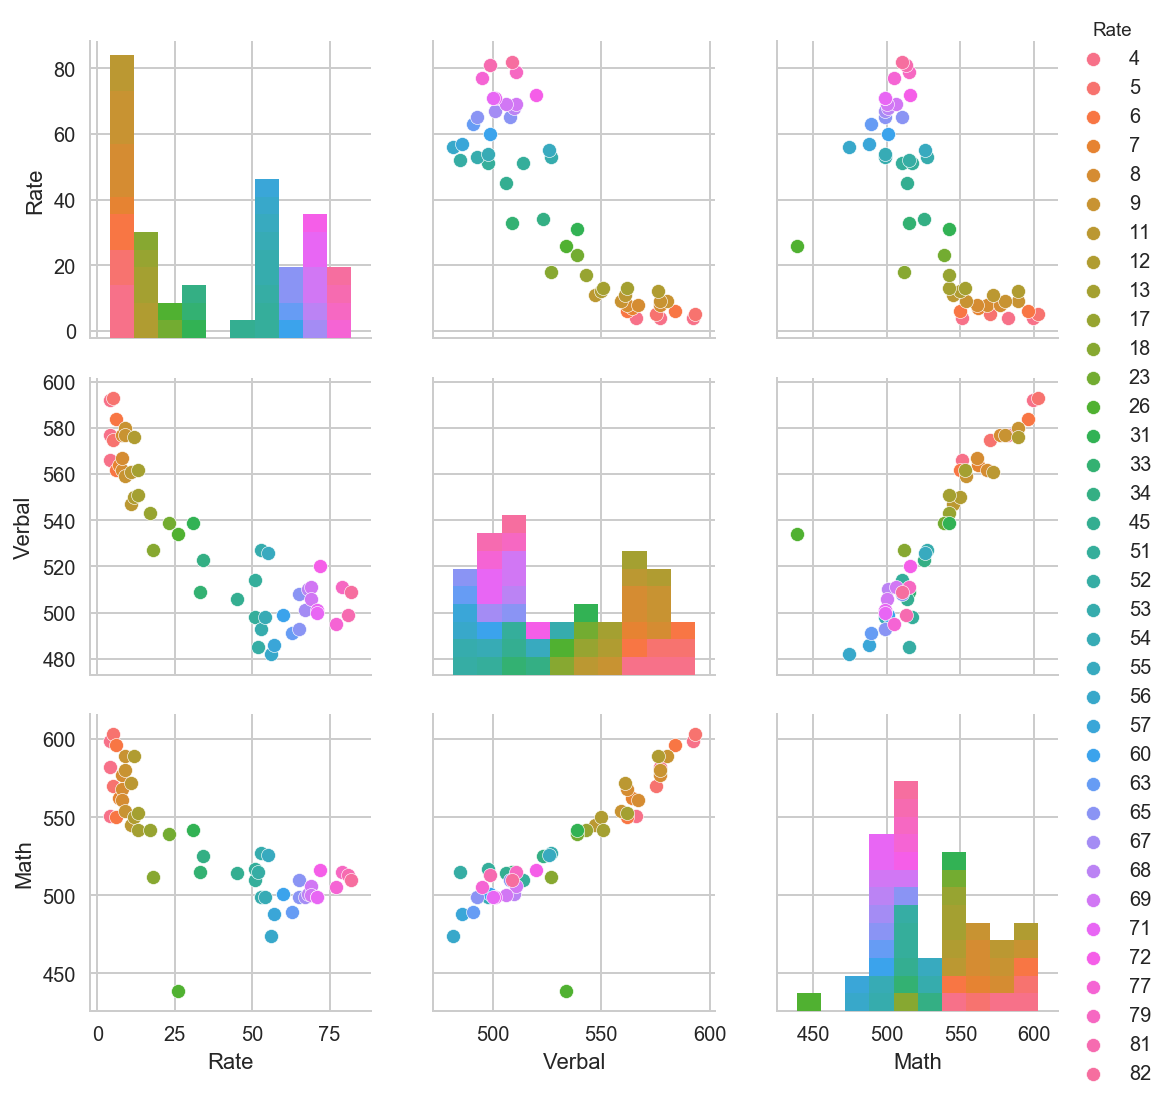

In [70]:
sns.pairplot(df_read,palette="husl", hue ='Rate')

Using seaborn's pairplot, show the joint distributions for Math, and Verbal

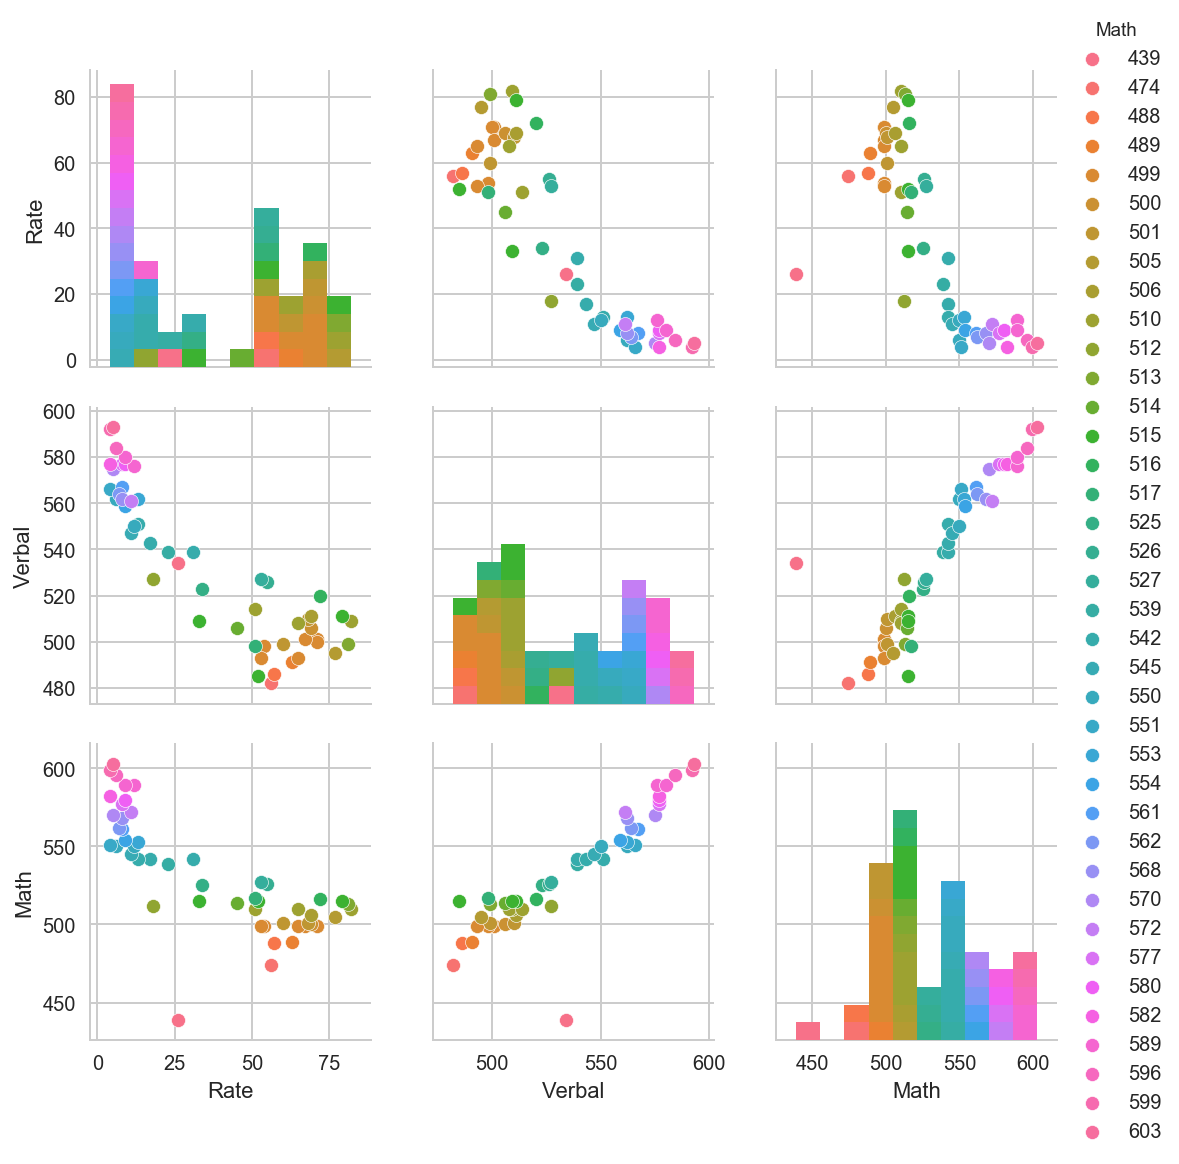

In [71]:

sns.pairplot(df_read,palette="husl", hue ='Math')

Using seaborn's pairplot, show the joint distributions for Verbal

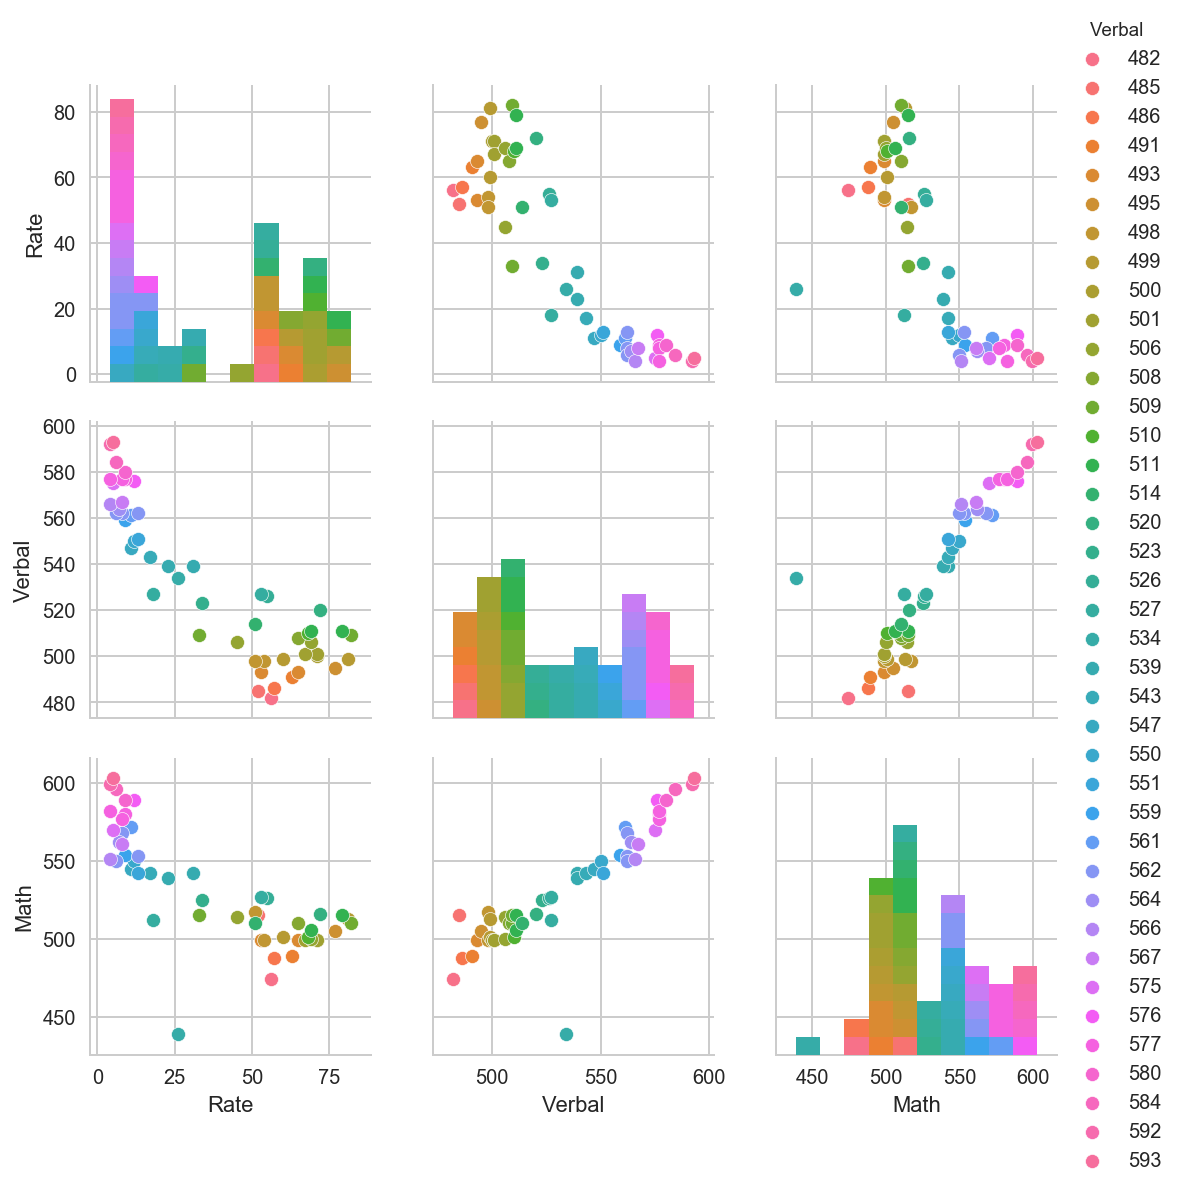

In [72]:
sns.pairplot(df_read,palette="husl", hue ='Verbal')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

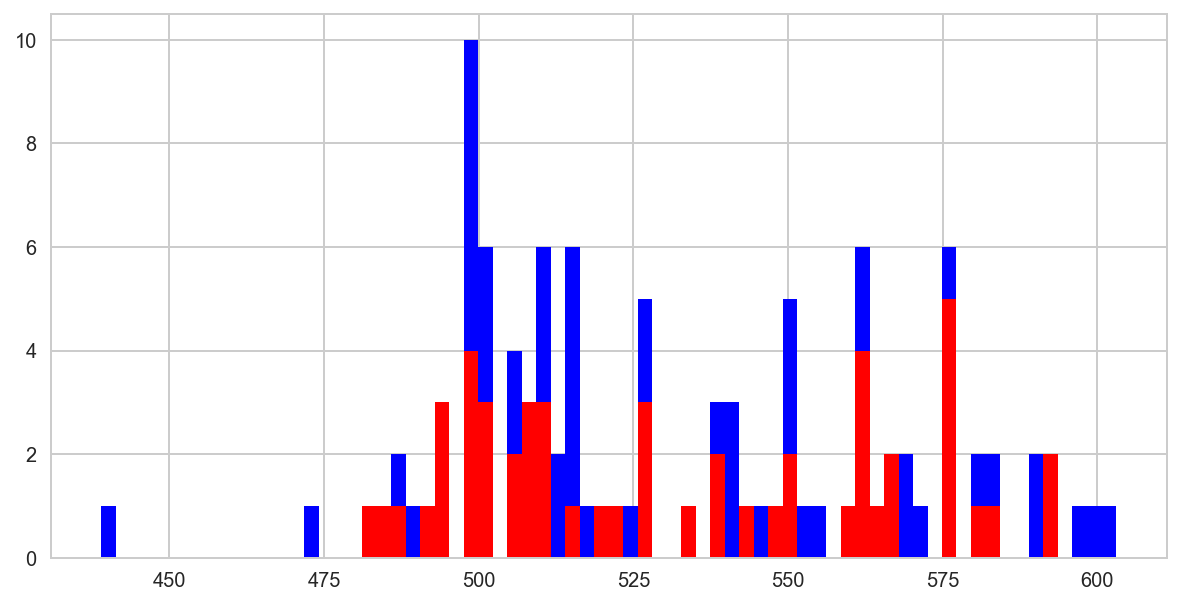

In [74]:

plt.figure(figsize=(10,5))
plt.hist([df_read['Verbal'],df_read['Math']],stacked=True, color = ['r','b'],bins=70)
None

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

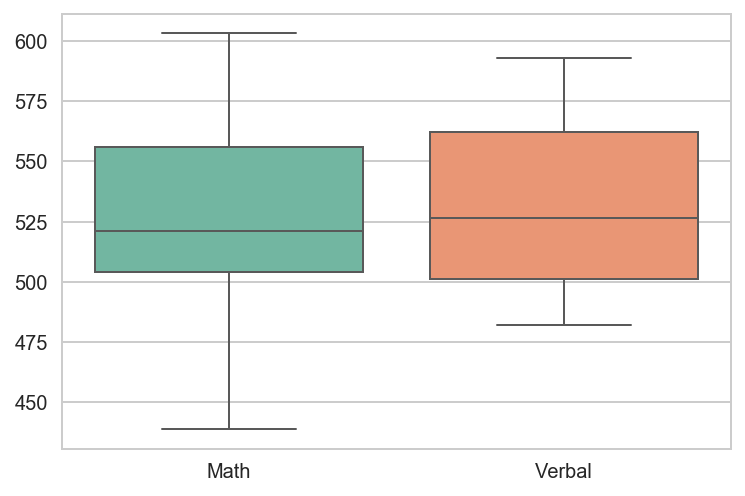

In [125]:
 sns.boxplot(data=df_read[['Math','Verbal']],linewidth=1,palette="Set2")

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


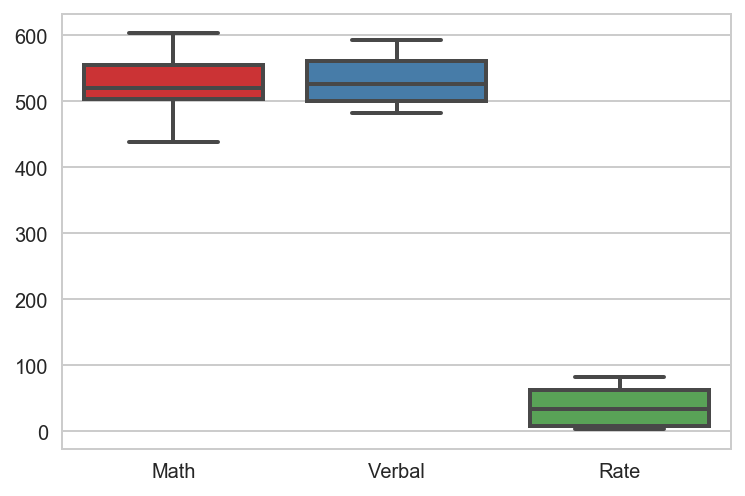

In [126]:
sns.boxplot(data= df_read[['Math','Verbal','Rate']],linewidth=2,orient="v",palette="Set1")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [99]:
print('Verbal Score across the entire dataset =', df_read['Verbal'].mean())
verbal_score= df_read[df_read['Verbal'] > df_read['Verbal'].mean()]
verbal_score.head(10)

Verbal Score across the entire dataset = 532.0192307692307


,Rate,Verbal,Math
State,,,
CO,31,539,542
OH,26,534,439
MT,23,539,539
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589
KY,12,550,550
WY,11,547,545


### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [100]:
print('Verbal median Score across the entire dataset =', df_read['Verbal'].median())
verbal_score_median=df_read[df_read['Verbal'] > df_read['Verbal'].median()]
verbal_score_median.head(10)

Verbal median Score across the entire dataset = 526.5


,Rate,Verbal,Math
State,,,
WA,53,527,527
CO,31,539,542
OH,26,534,439
MT,23,539,539
WV,18,527,512
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [101]:
df_read['Verbal_Math'] = df_read['Verbal'] - df_read['Math']
df_read.head(10)

,Rate,Verbal,Math,Verbal_Math
State,,,,
CT,82,509,510,-1
NJ,81,499,513,-14
MA,79,511,515,-4
NY,77,495,505,-10
NH,72,520,516,4
RI,71,501,499,2
PA,71,500,499,1
VT,69,511,506,5
ME,69,506,500,6


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

Create a new dataframe by copying from the old df.

In [102]:
new_df_read =df_read.copy()

In [104]:
new_df_read.head(10)

,Rate,Verbal,Math,Verbal_Math
State,,,,
CT,82,509,510,-1
NJ,81,499,513,-14
MA,79,511,515,-4
NY,77,495,505,-10
NH,72,520,516,4
RI,71,501,499,2
PA,71,500,499,1
VT,69,511,506,5
ME,69,506,500,6


In [105]:
df_new_read = new_df_read.sort_values('Verbal_Math', ascending=False).head(10)
df_new_read

,Rate,Verbal,Math,Verbal_Math
State,,,,
OH,26,534,439,95
MS,4,566,551,15
WV,18,527,512,15
AR,6,562,550,12
NM,13,551,542,9
TN,13,562,553,9
VA,68,510,501,9
DC,56,482,474,8
ME,69,506,500,6


In [106]:
df_read['Math_Verbal'] = df_read['Math'] - df_read['Verbal']
new_df_read = df_read.copy()

In [107]:
new_df_read.sort_values('Math_Verbal', ascending= False).head(10)

,Rate,Verbal,Math,Verbal_Math,Math_Verbal
State,,,,,
HI,52,485,515,-30,30
CA,51,498,517,-19,19
NJ,81,499,513,-14,14
IL,12,576,589,-13,13
WI,6,584,596,-12,12
MI,11,561,572,-11,11
NY,77,495,505,-10,10
IA,5,593,603,-10,10
MN,9,580,589,-9,9


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


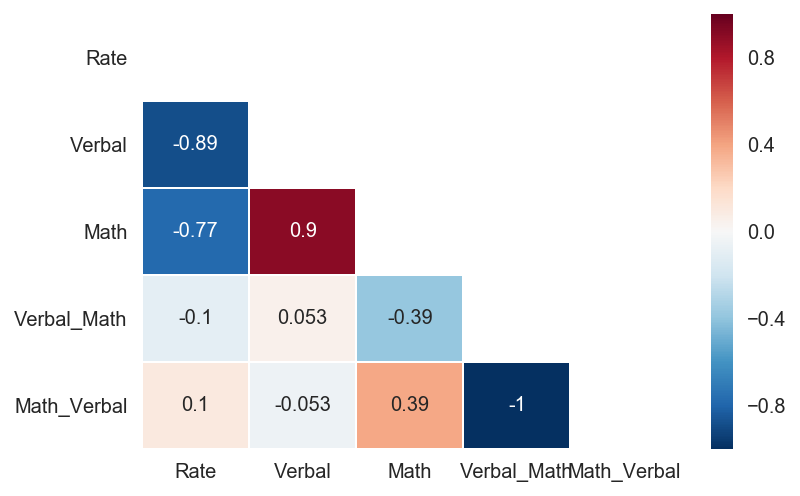

In [124]:
corr_matrix = df_read.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,annot=True,linewidths=0.5, mask =mask)
    
None


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [250]:
df_read.describe()

,Rate,Verbal,Math,Verbal_Math,Math_Verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


count - It represents the no. of rows in the datset for each column. mean - It is the mean value for the respective columns calculated by (summation of xi/n), where xi in the ith element in each column and n is the total number of values in the column. std - Standard deviation is a measure of the dispersion of a set of data from its mean. It is calculated as the square root of variance by determining the variation between each data point relative to the mean. min - minimum value in each column. 25% - Splits off the lowest 25% of data from the highest 75% 50% - Also knows as median, this value mean that 50% of the datset in resective columns have value greater than this value.This cuts data set in half. 75 % - Splits off the highest 25% of data from the lowest 75% max - Maximum value in each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [251]:
df_read.cov()

,Rate,Verbal,Math,Verbal_Math,Math_Verbal
Rate,745.387632,-804.355958,-760.803922,-43.552036,43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623,-27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373,219.931373
Verbal_Math,-43.552036,27.499623,-219.931373,247.430995,-247.430995
Math_Verbal,43.552036,-27.499623,219.931373,-247.430995,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [128]:
df_drug = pd.read_csv('drug-use-by-age.csv')

In [129]:
test_corr= df_drug.corr()
test_corr

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,...,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,...,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,...,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,...,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,0.008743,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,...,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095


In [254]:
sns.pairplot(df_drug)


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [162]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [163]:
df_drug.columns.values

array(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency',
       'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency',
       'hallucinogen-use', 'hallucinogen-frequency', 'inhalant-use',
       'inhalant-frequency', 'pain-releiver-use',
       'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency',
       'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use',
       'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use',
       'sedative-frequency'], dtype=object)

In [164]:
df_drug.shape

(17, 28)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

HO: the difference of drinking alcohol between the under30 group and over 30 group is 0

H1: the difference of drinking alcohol between the under30 group and over 30 group is not 0

**Report**



...

In [167]:
df_drug_analyze =df_drug.iloc[:,0:6]
df_drug_analyze

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
0,12,2798,3.9,3.0,1.1,4.0
1,13,2757,8.5,6.0,3.4,15.0
2,14,2792,18.1,5.0,8.7,24.0
3,15,2956,29.2,6.0,14.5,25.0
4,16,3058,40.1,10.0,22.5,30.0
5,17,3038,49.3,13.0,28.0,36.0
6,18,2469,58.7,24.0,33.7,52.0
7,19,2223,64.6,36.0,33.4,60.0
8,20,2271,69.7,48.0,34.0,60.0
9,21,2354,83.2,52.0,33.0,52.0


In [174]:

df_drug_analyze['alc_no'] = df_drug_analyze['n'] * df_drug_analyze['alcohol-use'] *0.01

In [175]:
df_drug_analyze['mar_no'] = df_drug_analyze['n'] * df_drug_analyze['marijuana-use'] *0.01

In [176]:

Users = df_drug_analyze.round({'alc_no':0, 'mar_no':0})
Users

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,alc_no,mar_no
0,12,2798,3.9,3.0,1.1,4.0,109.0,31.0
1,13,2757,8.5,6.0,3.4,15.0,234.0,94.0
2,14,2792,18.1,5.0,8.7,24.0,505.0,243.0
3,15,2956,29.2,6.0,14.5,25.0,863.0,429.0
4,16,3058,40.1,10.0,22.5,30.0,1226.0,688.0
5,17,3038,49.3,13.0,28.0,36.0,1498.0,851.0
6,18,2469,58.7,24.0,33.7,52.0,1449.0,832.0
7,19,2223,64.6,36.0,33.4,60.0,1436.0,742.0
8,20,2271,69.7,48.0,34.0,60.0,1583.0,772.0
9,21,2354,83.2,52.0,33.0,52.0,1959.0,777.0


In [180]:
under30 = pd.DataFrame(Users[:13])
under30#.n.sum()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,alc_no,mar_no
0,12,2798,3.9,3.0,1.1,4.0,109.0,31.0
1,13,2757,8.5,6.0,3.4,15.0,234.0,94.0
2,14,2792,18.1,5.0,8.7,24.0,505.0,243.0
3,15,2956,29.2,6.0,14.5,25.0,863.0,429.0
4,16,3058,40.1,10.0,22.5,30.0,1226.0,688.0
5,17,3038,49.3,13.0,28.0,36.0,1498.0,851.0
6,18,2469,58.7,24.0,33.7,52.0,1449.0,832.0
7,19,2223,64.6,36.0,33.4,60.0,1436.0,742.0
8,20,2271,69.7,48.0,34.0,60.0,1583.0,772.0
9,21,2354,83.2,52.0,33.0,52.0,1959.0,777.0


In [181]:
under30.n.sum()

38642

In [182]:
under30.alc_no.sum()

20761.0

In [183]:
over30 = pd.DataFrame(Users[13:])
over30

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,alc_no,mar_no
13,30-34,2864,77.5,52.0,16.4,72.0,2220.0,470.0
14,35-49,7391,75.0,52.0,10.4,48.0,5543.0,769.0
15,50-64,3923,67.2,52.0,7.3,52.0,2636.0,286.0
16,65+,2448,49.3,52.0,1.2,36.0,1207.0,29.0


In [184]:
over30.n.sum()

16626

In [185]:
over30.alc_no.sum()

11606.0

In [188]:
import scipy.stats

In [196]:
(test, p_value, dof, expected) = scipy.stats.chi2_contingency([[20761,17881],[11606,5020]])
print('test=',test, 'p_value=',p_value)

test= 1237.92347768 p_value= 3.49603163952e-271


### R.
since the P value is way higher than 1, which means the H0 is accepted

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

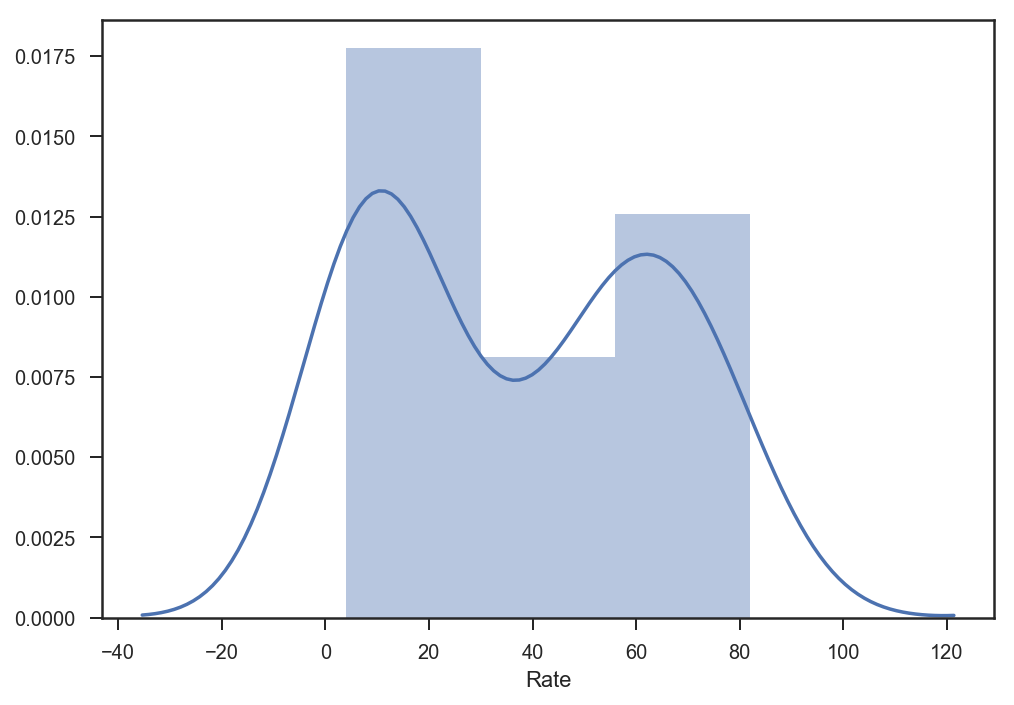

In [202]:
sns.distplot(df_read.Rate,kde=True)


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [200]:
df_read[['Verbal','Math']].corr('spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [199]:
df_read['percentiles'] = np.argsort(np.argsort(df_read.Rate)) * 100. / (len(df_read.Rate) - 1)
df_read.head(10)

,Rate,Verbal,Math,Verbal_Math,Math_Verbal,percentiles
State,,,,,,
CT,82,509,510,-1,1,100.000000
NJ,81,499,513,-14,14,98.039216
MA,79,511,515,-4,4,96.078431
NY,77,495,505,-10,10,94.117647
NH,72,520,516,4,-4,92.156863
RI,71,501,499,2,-2,90.196078
PA,71,500,499,1,-1,88.235294
VT,69,511,506,5,-5,86.274510
ME,69,506,500,6,-6,84.313725


In [ ]:
# ### 9.3 Percentiles and outliers

# 1. Why might percentile scoring be useful for dealing with outliers?
# 2. Plot the distribution of a variable of your choice from the drug use dataset.
# 3. Plot the same variable but percentile scored.
# 4. Describe the effect, visually, of coverting raw scores to percentile.